<a href="https://colab.research.google.com/github/gauravguptagtm/deep-learning-notebook/blob/main/DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Trick (Train a perceptron)
 This trick say that


* Initialize Weights: Set initial weights randomly.
* Forward Pass: Compute the weighted sum of inputs and pass it through an activation function.
* Calculate Error: Compare the predicted output with the actual target.
* Update Weights: Adjust weights based on the error using a learning rate and the gradient descent algorithm.
* Repeat: Iterate through the dataset multiple times (epochs) until the model converges.


### How Line transforms?

Suppose we have a point (x,y) which is in wrong side(positive side), so calculation which we do
```
w1-x,  w2-y,  b-1
```

if point (x,y) which is in wrong side(negative side), so calculation which we do
```
w1+x,  w2+y,  b+1
```
Now we draw line on basis of this.
We never do this much transformation, we use learning rate for this.

```
old coeff. - (learningrate * coordinate)
```
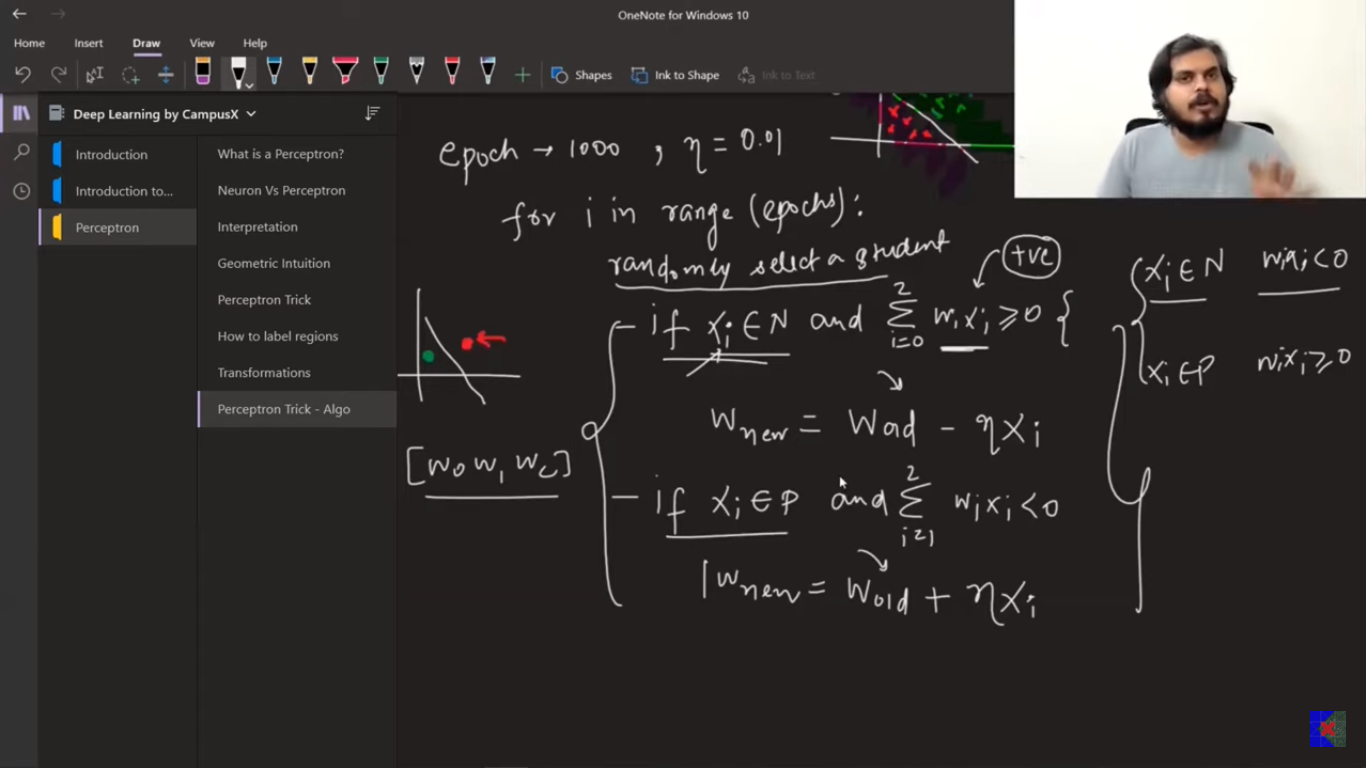


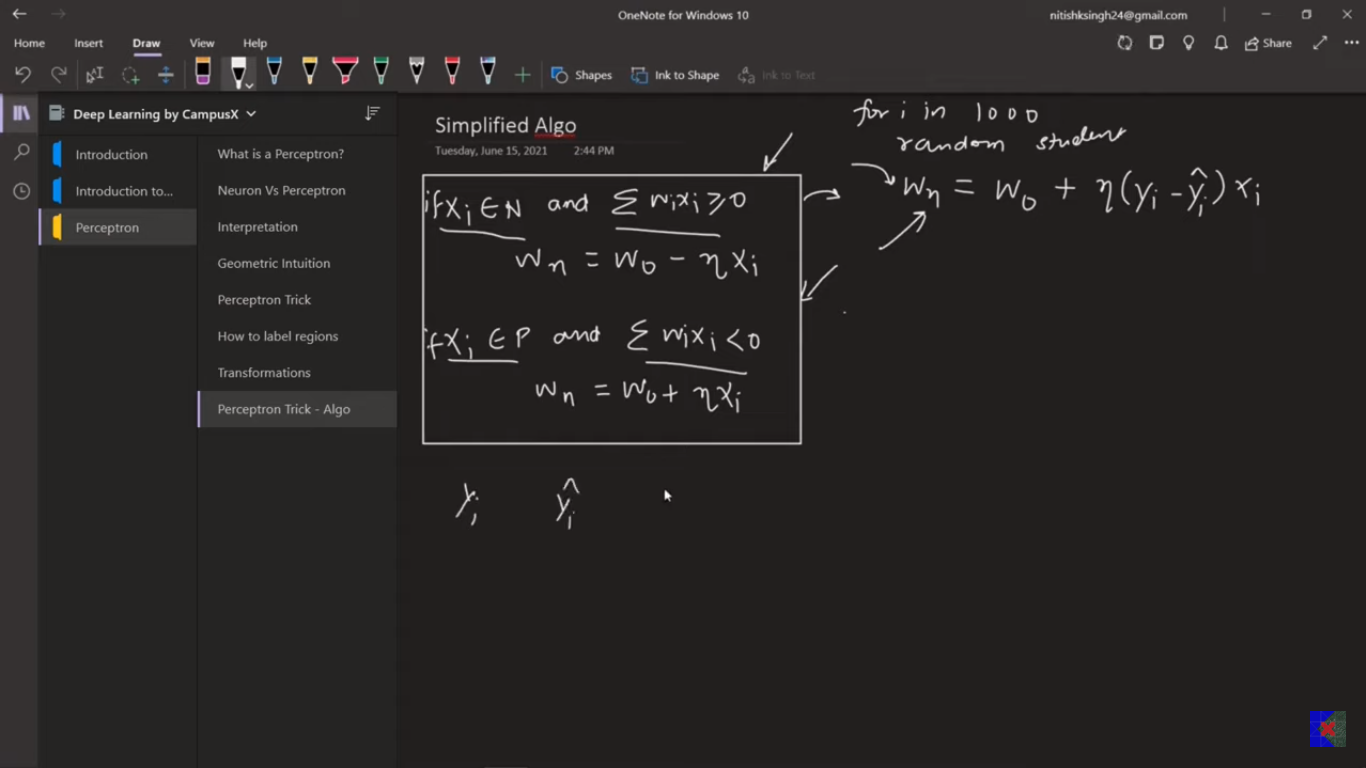



In [2]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [3]:
import matplotlib.pyplot as plt

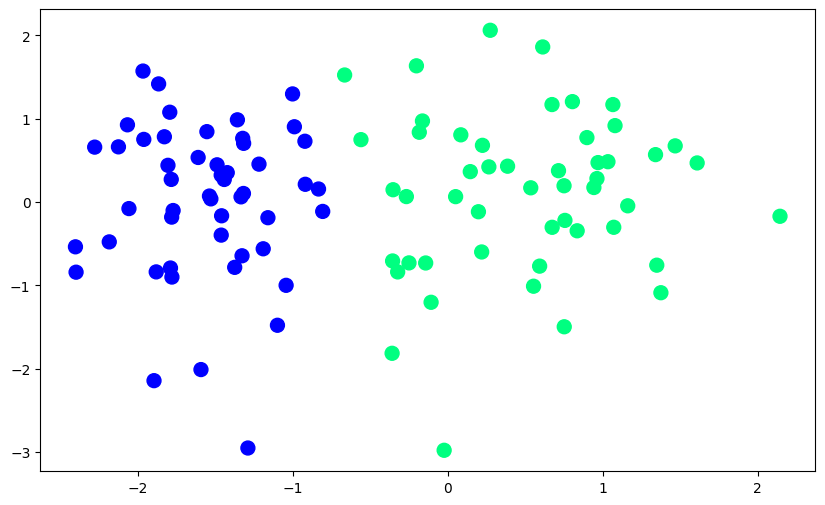

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [8]:
def step(z):
  return 0 if z<0 else 1

In [11]:
def perceptron(X,y):

  X = np.insert(X, 0,1, axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights ))
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0], weights[1:]

In [12]:
intercept_, coef_ = perceptron(X, y)

In [13]:
intercept_

0.9

In [14]:
coef_

array([1.36804893, 0.22489185])

In [16]:
m = -(coef_[0]/ coef_[1])
b = -(intercept_/coef_[1])

In [17]:
x_input = np.linspace(-3, 3, 100)
y_input = m*x_input + b

(-3.0, 3.0)

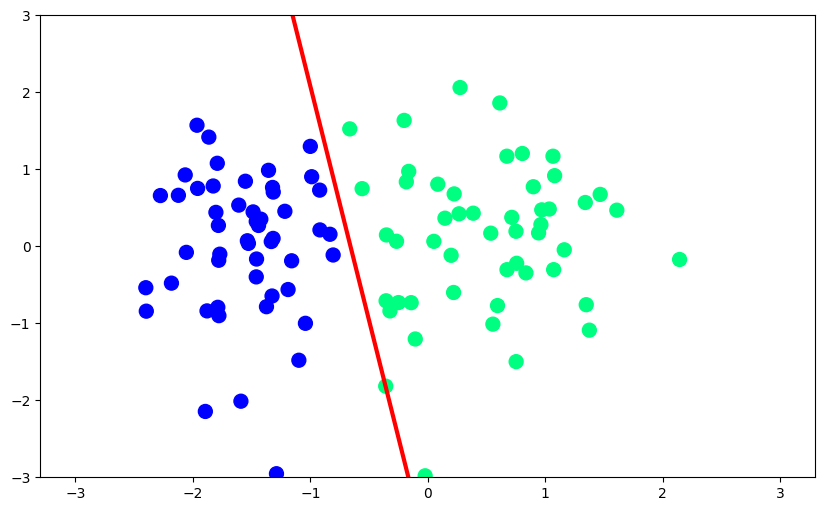

In [29]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3, 3)